exploration et suppression des valeurs manquantes et aberrantes


In [1]:
import pandas as pd
import seaborn as sns
import pickle as pk 
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


preparation des fonctions


In [2]:
# voire distribution de classe cible
couleurs=['yellow','blue']
def distribution_target(df,titre=""):
    plt.figure(figsize=(8,8))
    plt.pie(x=[df[df['DEFAUT']==1].shape[0],df[df['DEFAUT']==0].shape[0]],colors=couleurs,explode=[0.05,0.05],shadow=False,autopct='%1.1f%%',)
    plt.legend(['defaut bancaire','non-defaut bancaire'])
    centre_circle = plt.Circle((0, 0), 0.50, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title('distribution des classe cibles'+titre)
    plt.show()


exploration generale


In [4]:
#charger et afficher les donnees
df=pd.read_excel('../data/Data_TPE_Stagiaire.xlsx')
df.rename(columns={'NUM CLT':'NUM_CLT'},inplace=True)
df

In [6]:
df.describe()

,ANNEE,ACT_COURANT,PASS_COURANT,STOCKS,LIQ,FPN,TOT_BL,DS,CAP_PROP,CP,...,FR_BFR,CA_CAP_PROP,CA_TOT_BL,D_CLT,D_FOURN,D_STK,ROA,ROE,RN_CA,DEFAUT
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,...,8313.000000,8335.000000,8378.000000,7896.000000,7896.000000,7896.000000,8378.000000,8335.000000,7896.000000,8378.000000
mean,2019.888756,769.668850,562.275799,270.660595,85.080967,894.276754,1637.317119,160.479835,893.917977,1060.045792,...,-0.269546,3.018327,1.307177,1.701243,2.841119,3.227175,0.078209,0.258757,-0.396510,0.048341
std,0.788959,4183.410829,2058.488888,1782.469796,1199.003199,18703.550369,19521.661901,1225.596214,18703.553785,19111.275572,...,112.505607,36.533203,5.652439,81.366633,140.391805,75.639610,1.232431,3.590464,11.679566,0.214498
min,2019.000000,0.000000,0.000000,0.000000,0.000000,-20277.000000,0.000043,0.000000,-20277.000000,-19193.000000,...,-10054.084075,-1318.650556,0.000000,-0.208768,0.000000,0.000000,-82.000000,-85.788814,-606.500000,0.000000
25%,2019.000000,117.619766,64.134719,0.000000,2.743662,39.254750,188.375003,0.000000,39.000000,56.000000,...,0.620000,0.622960,0.439816,0.044130,0.056014,0.000000,0.000000,0.026564,0.012466,0.000000
50%,2020.000000,263.073968,184.437614,37.570500,11.853072,113.218901,388.597898,0.000000,113.086089,146.956480,...,0.984848,2.099057,0.903860,0.173693,0.187500,0.113446,0.051305,0.182197,0.060499,0.000000
75%,2021.000000,526.000000,435.199723,156.693575,45.545750,259.000000,778.996804,53.459226,259.000000,328.955250,...,1.240385,4.475349,1.547506,0.388889,0.460312,0.420072,0.151724,0.444444,0.128445,0.000000
max,2021.000000,137972.000000,71008.000000,83725.000000,99609.243000,882239.000000,887816.000000,58239.000000,882239.000000,885160.000000,...,1294.282001,1244.043478,469.979306,6412.000000,11134.000000,4246.000000,72.230906,145.857143,54.366197,1.000000


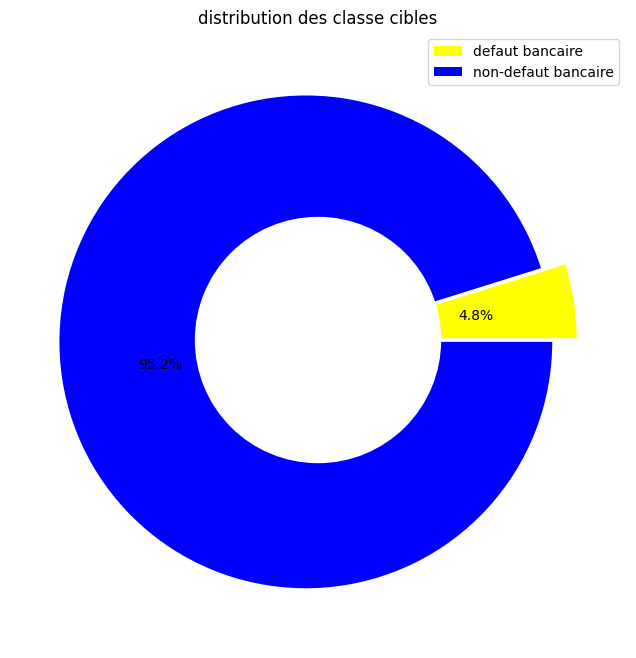

In [7]:
distribution_target(df)

In [8]:
#nombre des lignes duplique
df.shape[0]-df.drop_duplicates().shape[0]

0

In [ ]:
#valeurs manquantes pour chaque variable
df.isna().sum()


2896

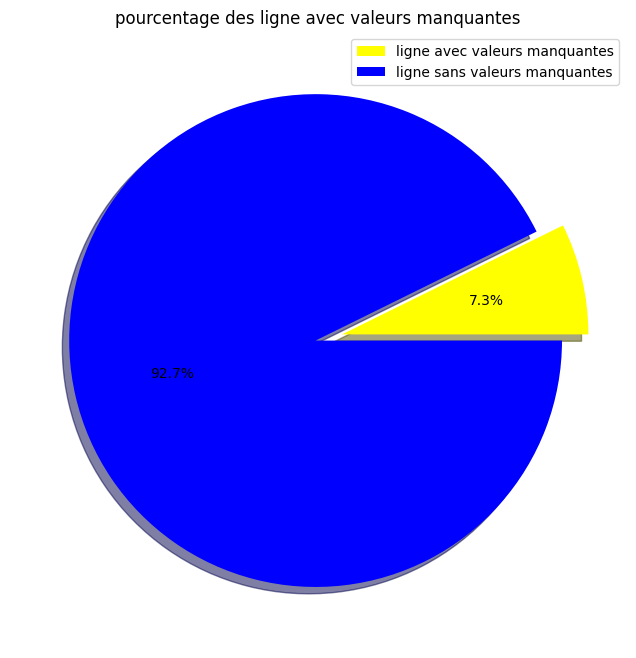

In [10]:
plt.figure(figsize=(8,8))
plt.pie(x=[df.shape[0]-df.dropna().shape[0],df.dropna().shape[0]],colors=couleurs,explode=[0.1,0.01],shadow=True,autopct='%1.1f%%')
plt.legend(['ligne avec valeurs manquantes','ligne sans valeurs manquantes'])
plt.title('pourcentage des ligne avec valeurs manquantes')
plt.show()


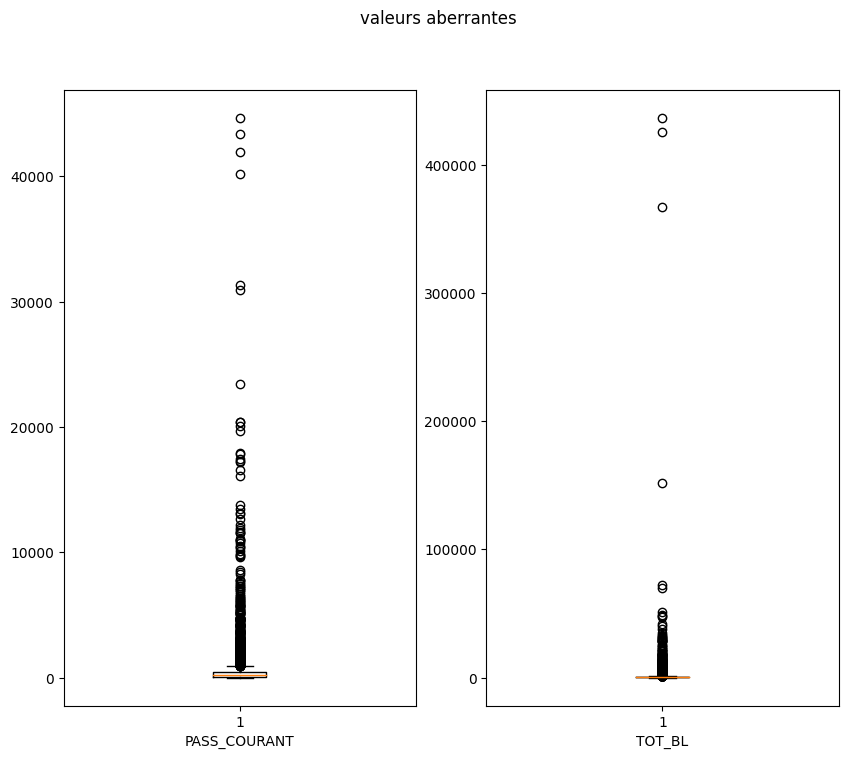

In [11]:
#exemple comment visualiser quelques valeurs aberrantes (pour le rapport)
df1=df.dropna()
fig,axes=plt.subplots(1,2)
fig.set_size_inches(10,8)
fig.suptitle('valeurs aberrantes')
axes[0].boxplot(df1[['PASS_COURANT']])
axes[0].set_xlabel('PASS_COURANT')
axes[1].boxplot(df1[['TOT_BL']])
axes[1].set_xlabel('TOT_BL')
plt.show()

In [12]:
#lignes avec valeurs aberrantes localise dans le fichier 'valeurs_aberrantes'
ab_values_indexes={370,
 502,
 1113,
 1446,
 1709,
 1890,
 1972,
 2032,
 2192,
 2300,
 2707,
 3006,
 3024,
 3239,
 3353,
 3502,
 3596,
 3767,
 4315,
 4360,
 4635,
 4875,
 4906,
 5066,
 5258,
 5327,
 5410,
 5537,
 5693,
 5710,
 5774,
 5985,
 6038,
 6172,
 6878,
 6925,
 7633}

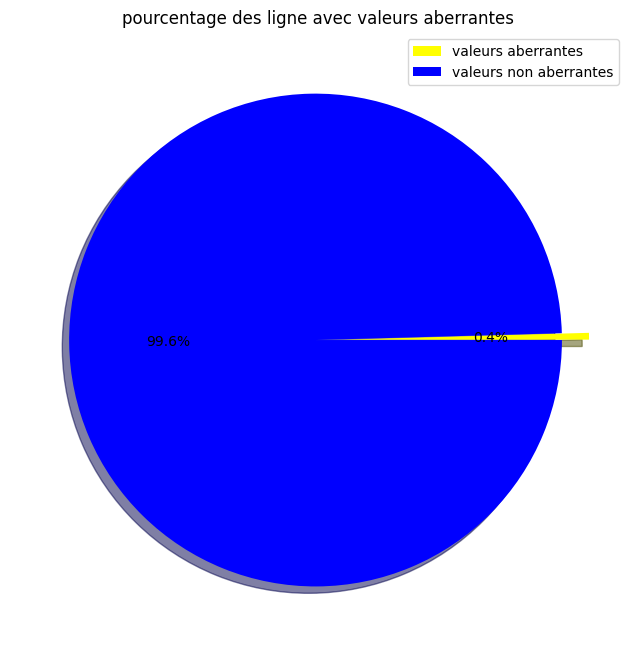

In [13]:
plt.figure(figsize=(8,8))
plt.pie(x=[ab_values_indexes.__len__(),df.shape[0]-ab_values_indexes.__len__()],colors=couleurs,explode=[0.1,0.01],shadow=True,autopct='%1.1f%%')
plt.legend(['valeurs aberrantes','valeurs non aberrantes'])
plt.title('pourcentage des ligne avec valeurs aberrantes')
plt.show()


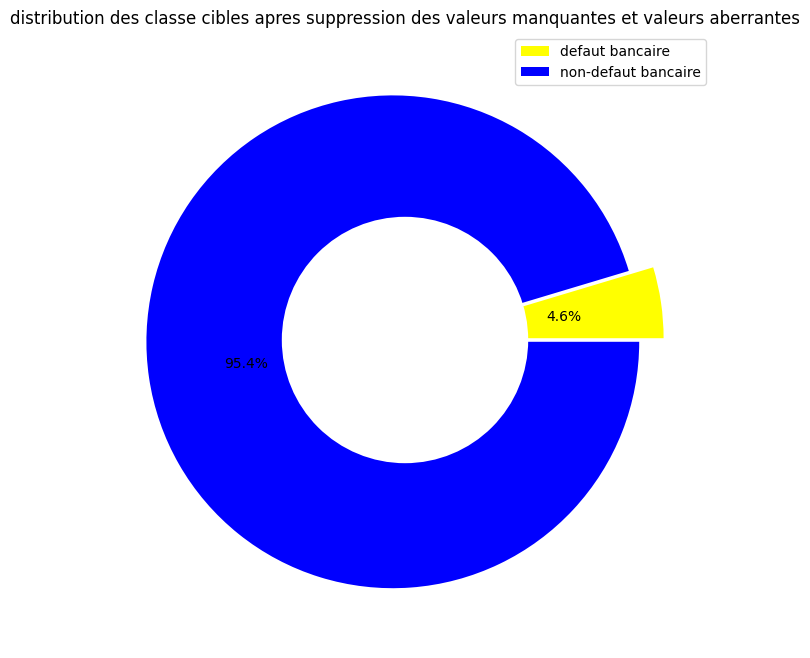

In [14]:
df.dropna(inplace=True)
df.drop(index=ab_values_indexes,inplace=True)
distribution_target(df,' apres suppression des valeurs manquantes et valeurs aberrantes')

df finale est enregistre en fichier pickle du nom 'original_df.pickle'